In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
last_date=session.query(measurement.date).order_by(measurement.date.desc()).first()
last_date

('2017-08-23',)

<Axes: xlabel='Dates'>

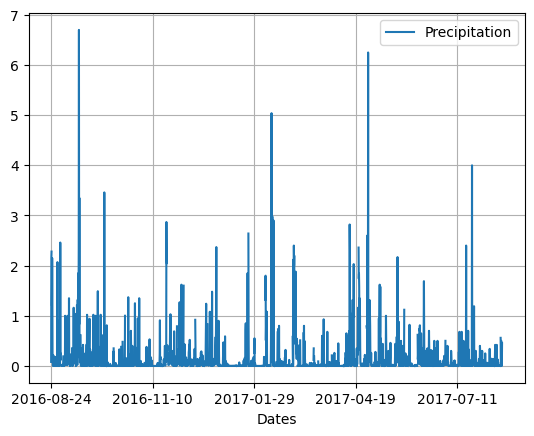

In [54]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
date_str = last_date[0]
date_object = datetime.strptime(date_str, '%Y-%m-%d')

# Calculate the date one year from the last date in data set.
one_year_ago = date_object - timedelta(days=365)
formatted_result = one_year_ago.strftime('%Y-%m-%d')

# Perform a query to retrieve the data and precipitation scores
date=session.query(measurement.date, measurement.prcp).filter(measurement.date > formatted_result).order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(date, columns = ['Dates','Precipitation'])

# Sort the dataframe by date
df_dates = df.sort_values(by = 'Dates')

# Use Pandas Plotting with Matplotlib to plot the data
df.set_index('Dates')
df_dates.plot(x = 'Dates' , grid = True)

In [55]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_dates.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [62]:
# Design a query to calculate the total number of stations in the dataset
from sqlalchemy import func
session.query(func.count(func.distinct(measurement.station))).scalar()

9

In [64]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
ordered_station=session.query( measurement.station , func.count(measurement.station)).group_by(measurement.station ).\
               order_by(func.count(measurement.station).desc()).all()
ordered_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [83]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281' ).all()

[(54.0, 85.0, 71.66378066378067)]

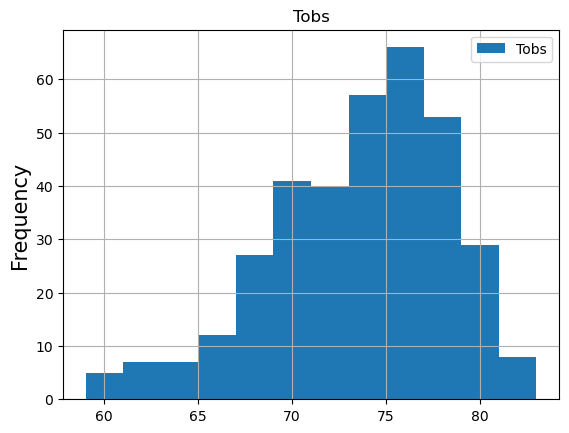

In [86]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_dt = session.query (measurement.date).filter(measurement.station == 'USC00519281').order_by(measurement.date.desc()).first()
results =  session.query(measurement.tobs).filter(measurement.station == 'USC00519281' ).filter(measurement.date >= formatted_result).all()
df = pd.DataFrame(results , columns = ['Tobs'])
df.hist( bins = 12)
plt.ylabel("Frequency", fontsize = 15)
labels = ["Tobs"]
plt.legend(labels)
plt.show()

# Close Session

In [16]:
# Close Session
session.close()